Название команды на Kuggle: Антон_Федоров

In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

## Загрузка данных

In [3]:
data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
data.sample(10) # загружу и посмотрю случайные строки

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3213,72,24.45,1709.1,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0
2010,4,76.05,318.9,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
4331,69,105.20,7386.05,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),0
4616,62,90.70,5586.45,Male,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),0
1720,4,87.10,341.45,Female,0,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,1
3136,24,49.70,1218.25,Male,0,No,No,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0
2422,28,90.10,2598.95,Female,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),1
2673,14,19.95,268.4,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
2680,22,100.05,2090.25,Male,0,Yes,Yes,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Mailed check,0
141,51,19.85,996.95,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0


In [4]:
data.info() # взгляну на общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

В данных нет null элементов ни в одном из столбцов, всего 5282 строки. Но признак TotalSpent имеет тип object, хотя является числовым признаком. Это связанно с там, что в этом столбце спристтсвуют строки, которые нельзя трактовать, как числа. Необходимо проеобразовать столбец к типу folat. 

In [6]:
data[data['TotalSpent'] == " "] # взгляну на строки с пустыми значениями TotalSpent

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [7]:
# преобразую столбцы в тестовых и обычных данных в тип float
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
test_data['TotalSpent'] = pd.to_numeric(test_data['TotalSpent'], errors='coerce')

data[data['TotalSpent'].isna()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Строки, которые невозможно интерпритировать, как число преобразовались в NaN-ы. Буду счиать их невалидными данными. Удалю.

In [8]:
data = data.dropna()
test_data = test_data.dropna()

Еще раз взглянем на общую информацию.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

Данные готовы к анализу.

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Построю гистограммы числовых признаков с параметрами по умолчанию.

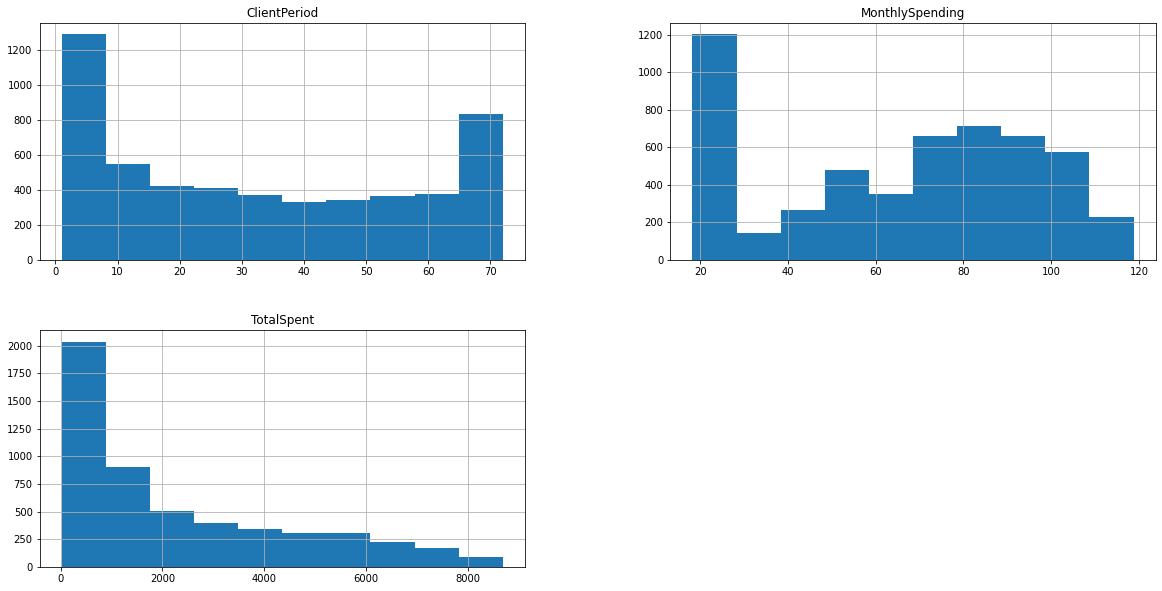

In [10]:
data.hist(column=num_cols, figsize=(20, 10))
None

При построении гистограммы есть несколько способов выбрять оптимальное число и ризмер bin-ов. Однако, воспользуюсь самым простом: число bin-ов равно корню из количества элементов с округлением вниз.

<Figure size 1080x360 with 0 Axes>

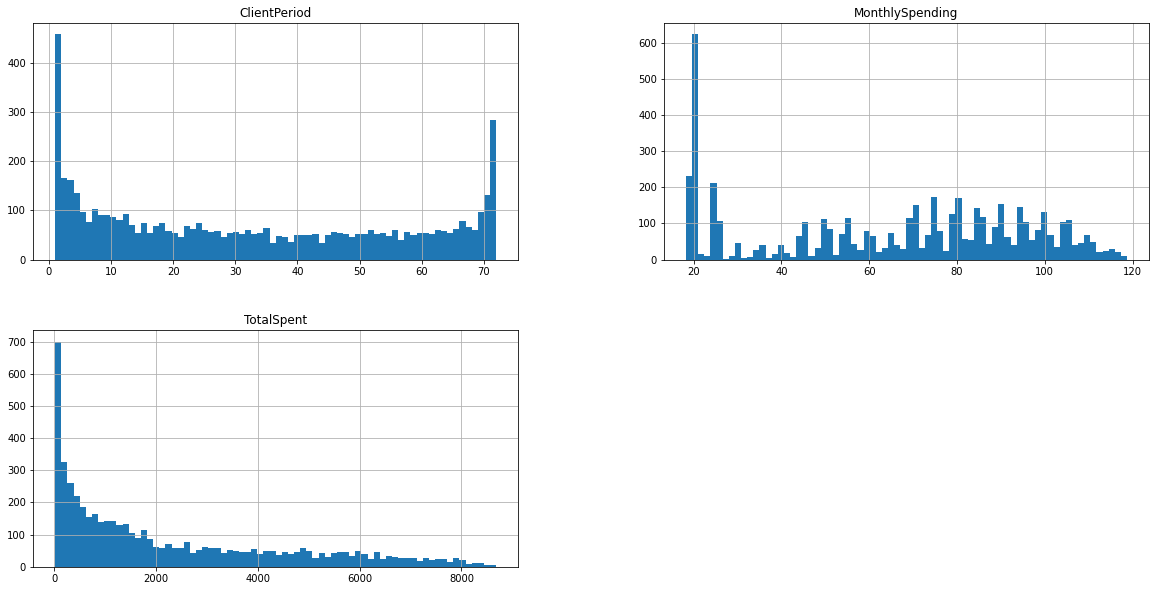

In [11]:
plt.figure(figsize=(15, 5))
binsNum = math.floor(math.sqrt(data.shape[0]))
data.hist(column=num_cols, bins=binsNum, figsize=(20, 10))
None

Стал виден скачкообразный вид гистограммы MonthlySpending. Однако, не считаю это критичным для обучения молелей. 

Также взгляну на категориальные признаки

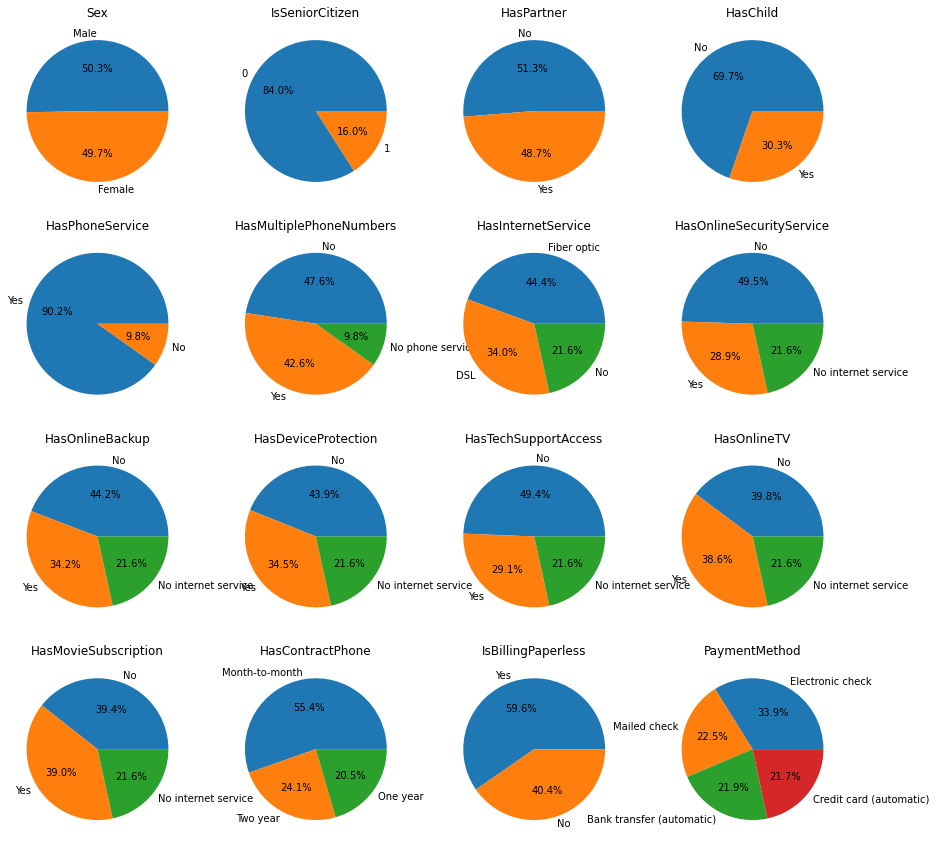

In [12]:
fig = plt.figure(figsize=(15,15))
for i in range(len(cat_cols)):
    cur_col = data[cat_cols[i]].value_counts()
    plt.subplot(4, 4, i+1)
    plt.pie(cur_col, labels=cur_col.index, autopct='%1.1f%%')
    plt.title(cat_cols[i])
plt.show()

Быстро посомтрим на данные в тестовой выборке.

<Figure size 1080x360 with 0 Axes>

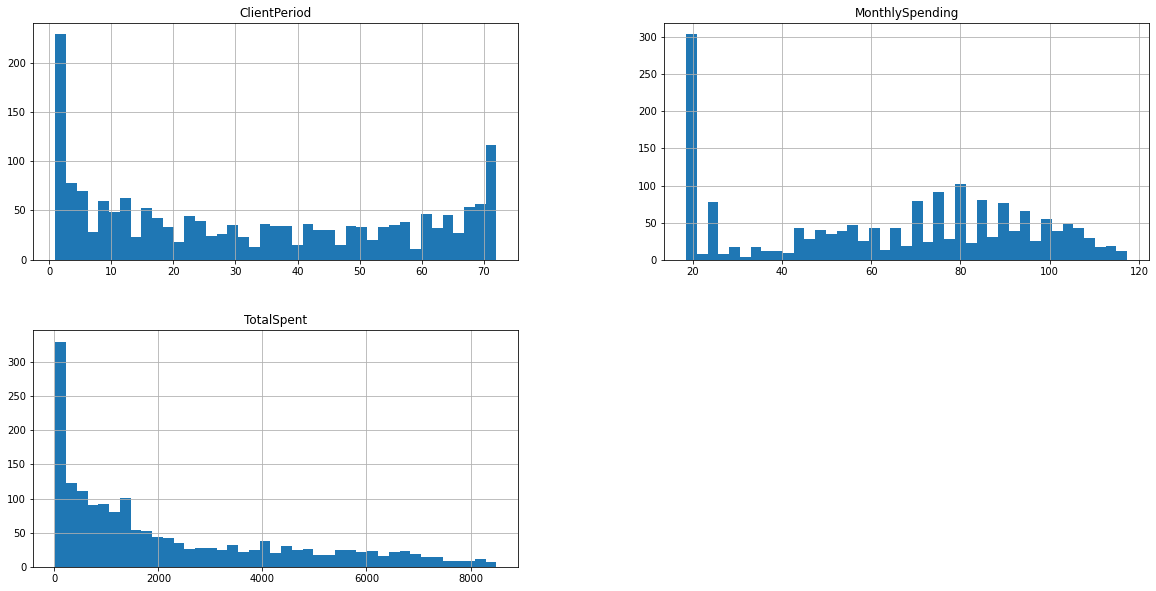

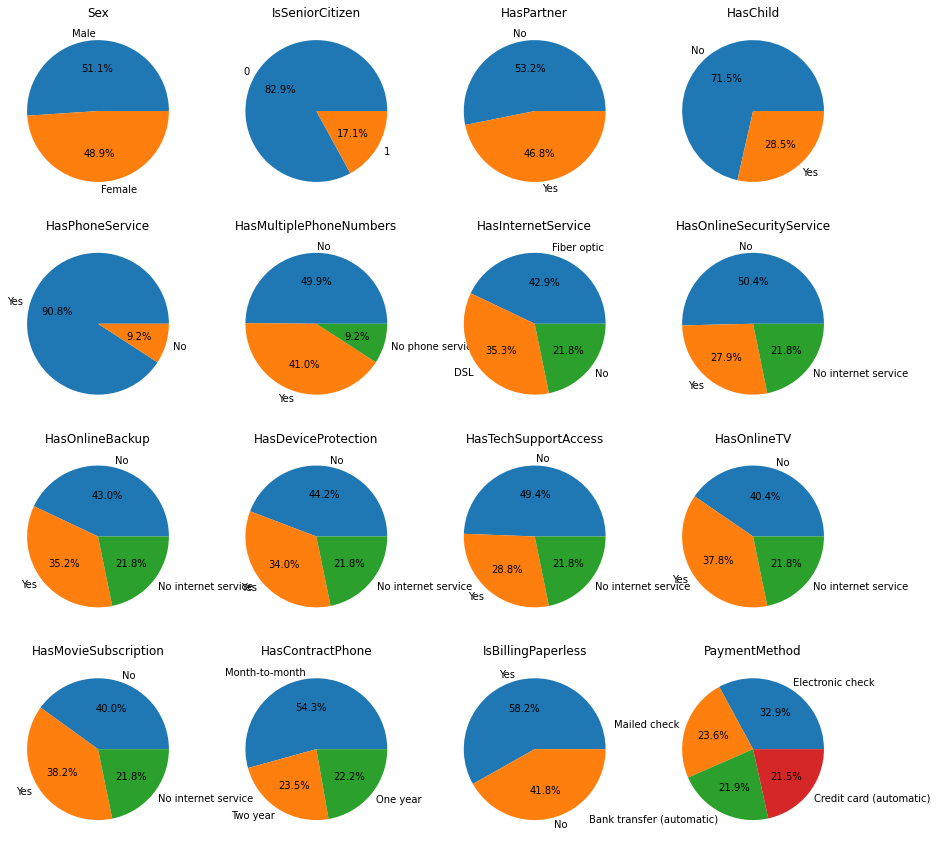

In [13]:
plt.figure(figsize=(15, 5))
binsNum = math.floor(math.sqrt(test_data.shape[0]))
test_data.hist(column=num_cols, bins=binsNum, figsize=(20, 10))

fig = plt.figure(figsize=(15,15))
for i in range(len(cat_cols)):
    cur_col = test_data[cat_cols[i]].value_counts()
    plt.subplot(4, 4, i+1)
    plt.pie(cur_col, labels=cur_col.index, autopct='%1.1f%%')
    plt.title(cat_cols[i])
plt.show()

Данные схожи. Хорошо для обучения.

Рассмотрю распределение целевой переменной.

<BarContainer object of 2 artists>

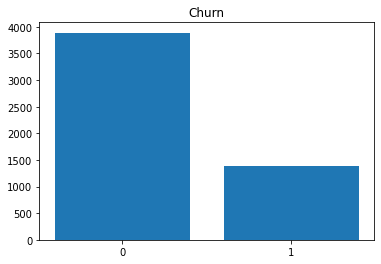

In [14]:
indexes = data[target_col].value_counts().index
counts = data[target_col].value_counts().values
plt.title('Churn')
plt.xticks(indexes)

plt.bar(indexes, counts)

Классы сбалансированны. Хорошо.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve

Сделаю pipeline для кроссвалидации.

In [16]:
num_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

Попробую подобрать параметр.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data[num_cols+cat_cols], 
                                                    data[target_col], 
                                                    train_size=0.8)

parameters = {'classifier__C': [100, 10, 1, 0.1, 0.01, 0.001]}

CV_model = GridSearchCV(estimator=clf, 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)

CV_model.fit(X_train, y_train)
None

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Посмотрю, что получилось.

In [18]:
CV_model.best_params_['classifier__C']

10

Установим модели лучший параметр и протестируем.

In [19]:
clf.set_params(classifier__C = CV_model.best_params_['classifier__C'])

clf.fit(X_train, y_train)
y_test_predicted = clf.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_predicted)
print(test_auc)

0.8496972001989409


Попробую подобрать параметр получше. 

In [20]:
parameters = {'classifier__C': [10*i for i in range(1,10)]}
parameters

{'classifier__C': [10, 20, 30, 40, 50, 60, 70, 80, 90]}

In [21]:
parameters = {'classifier__C': [10*i for i in range(1,10)]}

CV_model = GridSearchCV(estimator=clf, 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10)

CV_model.fit(X_train, y_train)
CV_model.best_params_['classifier__C']

Fitting 5 folds for each of 9 candidates, totalling 45 fits


10

Протестирую.

In [22]:
clf.set_params(classifier__C = CV_model.best_params_['classifier__C'])

clf.fit(X_train, y_train)
y_test_predicted = clf.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_predicted)
print(test_auc)

0.8496972001989409


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество на Kuggle: 0.84649;
лучший парамер C: 10.
---



## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [26]:
!pip install catboost
import catboost # документация: https://catboost.ai/docs

     |████████████████████████████████| 76.6 MB 1.3 MB/s 


Обучу CatBoostClassifier с параметрами по умолчанию.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data[num_cols+cat_cols], 
                                                    data[target_col], 
                                                    test_size=0.2)

boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols)
boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

Learning rate set to 0.019048
0:	learn: 0.6799935	total: 66.9ms	remaining: 1m 6s
1:	learn: 0.6680032	total: 82.2ms	remaining: 41s
2:	learn: 0.6570196	total: 96.4ms	remaining: 32s
3:	learn: 0.6456972	total: 111ms	remaining: 27.6s
4:	learn: 0.6350489	total: 126ms	remaining: 25.1s
5:	learn: 0.6252488	total: 138ms	remaining: 22.8s
6:	learn: 0.6151747	total: 151ms	remaining: 21.5s
7:	learn: 0.6063343	total: 166ms	remaining: 20.6s
8:	learn: 0.5980964	total: 180ms	remaining: 19.8s
9:	learn: 0.5917884	total: 187ms	remaining: 18.5s
10:	learn: 0.5840056	total: 209ms	remaining: 18.8s
11:	learn: 0.5771127	total: 225ms	remaining: 18.5s
12:	learn: 0.5700868	total: 239ms	remaining: 18.1s
13:	learn: 0.5633383	total: 256ms	remaining: 18s
14:	learn: 0.5565786	total: 271ms	remaining: 17.8s
15:	learn: 0.5501390	total: 285ms	remaining: 17.5s
16:	learn: 0.5439757	total: 295ms	remaining: 17.1s
17:	learn: 0.5386119	total: 302ms	remaining: 16.5s
18:	learn: 0.5327949	total: 315ms	remaining: 16.3s
19:	learn: 0.5

Протестирую и постро график.

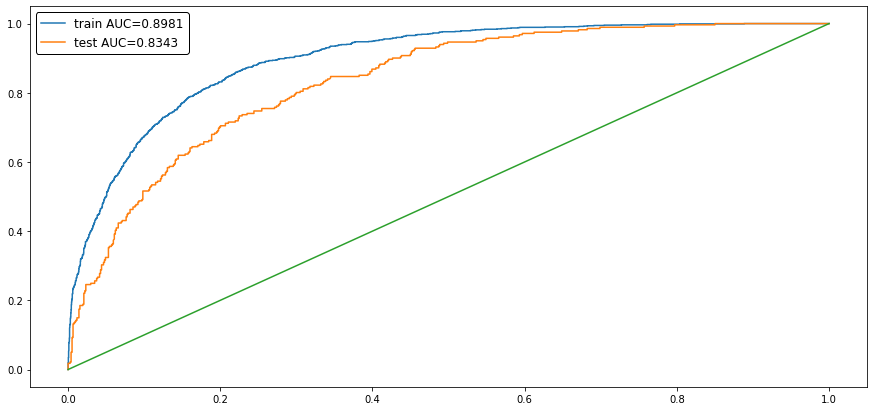

In [28]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(15,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Близко к логистической регрессии. Может быть можно учлушить?

Посмортю на значения параметров по умолчанию.

In [29]:
boosting_model.learning_rate_

0.019047999754548073

In [30]:
boosting_model.tree_count_

1000

Кажется, что число деревьев слишком больше. Переберу меньшие количества. Также кажется, что неплохо было бы повысить learning_rate. Переберу разные сочетания.

In [31]:
tree_nums = [100, 200, 300, 400, 500]
lrs = [0.01, 0.02, 0.04, 0.08]

best_tree_num = 500
best_lrs = 0.01
best_test_auc = 0

boosting_model.logging_level='Silent'

for tree_num in tree_nums:
  cur_test_aucs = []
  for lr in lrs:
    boosting_model = catboost.CatBoostClassifier(cat_features=cat_cols, 
                                                 n_estimators=tree_num, 
                                                 learning_rate=lr, 
                                                 logging_level='Silent')

    boosting_model.fit(X_train, y_train)
    y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
    y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_test, y_test_predicted)
    if(test_auc > best_test_auc):
      best_test_auc = test_auc
      best_tree_num = tree_num
      best_lrs = lr
    print('----------------------------')
    print('число деревьев:', tree_num, ', learning_rate:', lr)
    print('train_auc:', train_auc, ', test_auc:', test_auc)

----------------------------
число деревьев: 100 , learning_rate: 0.01
train_auc: 0.8339188758515008 , test_auc: 0.8254319659392904
----------------------------
число деревьев: 100 , learning_rate: 0.02
train_auc: 0.8476693506255376 , test_auc: 0.8306987778973213
----------------------------
число деревьев: 100 , learning_rate: 0.04
train_auc: 0.8607824276124214 , test_auc: 0.8313884520952304
----------------------------
число деревьев: 100 , learning_rate: 0.08
train_auc: 0.8669864327407086 , test_auc: 0.8340138118752701
----------------------------
число деревьев: 200 , learning_rate: 0.01
train_auc: 0.8601687503365256 , test_auc: 0.8296412774605277
----------------------------
число деревьев: 200 , learning_rate: 0.02
train_auc: 0.8668772892840043 , test_auc: 0.8327861918029923
----------------------------
число деревьев: 200 , learning_rate: 0.04
train_auc: 0.8730911900856995 , test_auc: 0.8332413767736122
----------------------------
число деревьев: 200 , learning_rate: 0.08
train

Посмотрю лучшие парматры и лучшее качетсво.

In [32]:
print('best_tree_num:', best_tree_num)
print('best_lrs:', best_lrs)
print('best_test_auc:', best_test_auc)

best_tree_num: 500
best_lrs: 0.02
best_test_auc: 0.8354322418089695


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество на Kuggle: 0.84989;
лучший парамер best_lrs: 0.02;
лучший парамер best_lrs: 500.

# Предсказания

In [33]:
best_model = catboost.CatBoostClassifier(cat_features=cat_cols, 
                                         n_estimators=best_tree_num, 
                                         learning_rate=best_lrs,
                                         logging_level='Silent')
best_model.fit(X_train, y_train)

Считаю тестовые данные по-новой. Для анализа были удалены невалидные строкию. Заменю пустые поля в TotalSpent на средние значение. 

In [34]:
maenTotalSpent = test_data['TotalSpent'].mean()

raw_test_data = pd.read_csv('./test.csv')
raw_test_data['TotalSpent'] = pd.to_numeric(raw_test_data['TotalSpent'], errors='coerce')
raw_test_data.loc[raw_test_data['TotalSpent'].isna(), 'TotalSpent'] = maenTotalSpent

X_test = raw_test_data

In [35]:
X_test = raw_test_data
Y_pred = best_model.predict_proba(raw_test_data)[:, 1]

In [36]:
submission = pd.read_csv('./submission.csv')
submission['Churn'] = Y_pred
submission.to_csv('./my_submission.csv', index=False)
submission.head(5)

,Id,Churn
0,0,0.036139
1,1,0.698295
2,2,0.663090
3,3,0.013689
4,4,0.004571


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.